In [339]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from google.colab import files
import io

In [340]:
# --------------------- Data Precess ---------------------
# Reading death data 2014-2018
# upload from local
uploaded = files.upload()
data_14_18 = pd.read_csv(io.BytesIO(uploaded['Weekly_Counts_of_Deaths_by_State_and_Select_Causes__2014-2018.csv']), 
                         index_col="Week Ending Date", 
                         parse_dates=True)

Saving Weekly_Counts_of_Deaths_by_State_and_Select_Causes__2014-2018.csv to Weekly_Counts_of_Deaths_by_State_and_Select_Causes__2014-2018 (8).csv


In [341]:
df_18_shape = data_14_18.shape
print(df_18_shape)

(14094, 29)


In [342]:
data_14_18.head()

,Jurisdiction of Occurrence,MMWR Year,MMWR Week,All Cause,Natural Cause,Septicemia (A40-A41),Malignant neoplasms (C00-C97),Diabetes mellitus (E10-E14),Alzheimer disease (G30),Influenza and pneumonia (J10-J18),Chronic lower respiratory diseases (J40-J47),"Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)","Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)","Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)","Diseases of heart (I00-I09,I11,I13,I20-I51)",Cerebrovascular diseases (I60-I69),flag_allcause,flag_natcause,flag_sept,flag_neopl,flag_diab,flag_alz,flag_inflpn,flag_clrd,flag_otherresp,flag_nephr,flag_otherunk,flag_hd,flag_stroke
Week Ending Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-01-04,Alabama,2014,1,355,327,NaN,60.0,NaN,10.0,NaN,20.0,NaN,NaN,12.0,87.0,18.0,NaN,NaN,Suppressed (counts 1-9),NaN,Suppressed (counts 1-9),NaN,Suppressed (counts 1-9),NaN,Suppressed (counts 1-9),Suppressed (counts 1-9),NaN,NaN,NaN
2014-01-11,Alabama,2014,2,872,792,23.0,163.0,23.0,35.0,32.0,61.0,14.0,22.0,25.0,199.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-18,Alabama,2014,3,1044,971,21.0,209.0,34.0,31.0,33.0,77.0,19.0,24.0,19.0,242.0,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-25,Alabama,2014,4,1022,967,25.0,205.0,23.0,25.0,42.0,74.0,16.0,22.0,35.0,249.0,53.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-02-01,Alabama,2014,5,1040,953,18.0,200.0,26.0,38.0,26.0,68.0,15.0,18.0,24.0,269.0,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [343]:
# select columns
df_14_18 = data_14_18.iloc[:, :16]
print(df_14_18)

                 Jurisdiction of Occurrence  ...  Cerebrovascular diseases (I60-I69)
Week Ending Date                             ...                                    
2014-01-04                          Alabama  ...                                18.0
2014-01-11                          Alabama  ...                                40.0
2014-01-18                          Alabama  ...                                60.0
2014-01-25                          Alabama  ...                                53.0
2014-02-01                          Alabama  ...                                50.0
...                                     ...  ...                                 ...
2018-12-01                    United States  ...                              2933.0
2018-12-08                    United States  ...                              2951.0
2018-12-15                    United States  ...                              3067.0
2018-12-22                    United States  ...                 

In [344]:
# rename
df_14_18 = df_14_18.rename(columns={
    "Jurisdiction of Occurrence" : "location",
    "MMWR Year" : "year",
    "MMWR Week" : "week",
    "All  Cause" : "total_death"
})
df_14_18 = df_14_18.rename_axis("date")
df_14_18.head()

,location,year,week,total_death,Natural Cause,Septicemia (A40-A41),Malignant neoplasms (C00-C97),Diabetes mellitus (E10-E14),Alzheimer disease (G30),Influenza and pneumonia (J10-J18),Chronic lower respiratory diseases (J40-J47),"Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)","Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)","Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)","Diseases of heart (I00-I09,I11,I13,I20-I51)",Cerebrovascular diseases (I60-I69)
date,,,,,,,,,,,,,,,,
2014-01-04,Alabama,2014,1,355,327,NaN,60.0,NaN,10.0,NaN,20.0,NaN,NaN,12.0,87.0,18.0
2014-01-11,Alabama,2014,2,872,792,23.0,163.0,23.0,35.0,32.0,61.0,14.0,22.0,25.0,199.0,40.0
2014-01-18,Alabama,2014,3,1044,971,21.0,209.0,34.0,31.0,33.0,77.0,19.0,24.0,19.0,242.0,60.0
2014-01-25,Alabama,2014,4,1022,967,25.0,205.0,23.0,25.0,42.0,74.0,16.0,22.0,35.0,249.0,53.0
2014-02-01,Alabama,2014,5,1040,953,18.0,200.0,26.0,38.0,26.0,68.0,15.0,18.0,24.0,269.0,50.0


In [345]:
# Reading death data 2019-2020
uploaded = files.upload()
data_19_20 = pd.read_csv(io.BytesIO(uploaded['Weekly_Counts_of_Deaths_by_State_and_Select_Causes__2019-2020.csv']), 
                         index_col="Week Ending Date", 
                         parse_dates=True)

Saving Weekly_Counts_of_Deaths_by_State_and_Select_Causes__2019-2020.csv to Weekly_Counts_of_Deaths_by_State_and_Select_Causes__2019-2020 (10).csv


In [346]:
df_20_shape = data_19_20.shape
df_20_shape

(5400, 33)

In [347]:
data_19_20.head()

,Jurisdiction of Occurrence,MMWR Year,MMWR Week,All Cause,Natural Cause,Septicemia (A40-A41),Malignant neoplasms (C00-C97),Diabetes mellitus (E10-E14),Alzheimer disease (G30),Influenza and pneumonia (J09-J18),Chronic lower respiratory diseases (J40-J47),"Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)","Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)","Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)","Diseases of heart (I00-I09,I11,I13,I20-I51)",Cerebrovascular diseases (I60-I69),"COVID-19 (U071, Multiple Cause of Death)","COVID-19 (U071, Underlying Cause of Death)",flag_allcause,flag_natcause,flag_sept,flag_neopl,flag_diab,flag_alz,flag_inflpn,flag_clrd,flag_otherresp,flag_nephr,flag_otherunk,flag_hd,flag_stroke,flag_cov19mcod,flag_cov19ucod
Week Ending Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-05,Alabama,2019,1,1077.0,993.0,30.0,198.0,22.0,60.0,21.0,63.0,14.0,21.0,27.0,261.0,53.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-12,Alabama,2019,2,1090.0,994.0,25.0,187.0,24.0,49.0,18.0,85.0,21.0,13.0,11.0,275.0,65.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-19,Alabama,2019,3,1114.0,1042.0,22.0,238.0,18.0,48.0,31.0,80.0,30.0,25.0,15.0,283.0,53.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-26,Alabama,2019,4,1063.0,994.0,21.0,165.0,22.0,50.0,22.0,113.0,14.0,25.0,23.0,279.0,56.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-02-02,Alabama,2019,5,1095.0,1026.0,18.0,199.0,19.0,52.0,19.0,80.0,20.0,24.0,21.0,290.0,50.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [348]:
# select columns
df_19_20 = data_19_20.iloc[:, :18]
print(df_19_20)

                 Jurisdiction of Occurrence  ...  COVID-19 (U071, Underlying Cause of Death)
Week Ending Date                             ...                                            
2019-01-05                          Alabama  ...                                         0.0
2019-01-12                          Alabama  ...                                         0.0
2019-01-19                          Alabama  ...                                         0.0
2019-01-26                          Alabama  ...                                         0.0
2019-02-02                          Alabama  ...                                         0.0
...                                     ...  ...                                         ...
2020-10-31                    United States  ...                                      5597.0
2020-11-07                    United States  ...                                      6781.0
2020-11-14                    United States  ...                      

In [349]:
# rename
df_19_20 = df_19_20.rename(columns={
    "Jurisdiction of Occurrence" : "location",
    "All Cause" : "total_death",	
    "MMWR Year" : "year",
    "MMWR Week" : "week"
})
df_19_20 = df_19_20.rename_axis("date")
df_19_20.head()

,location,year,week,total_death,Natural Cause,Septicemia (A40-A41),Malignant neoplasms (C00-C97),Diabetes mellitus (E10-E14),Alzheimer disease (G30),Influenza and pneumonia (J09-J18),Chronic lower respiratory diseases (J40-J47),"Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)","Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)","Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)","Diseases of heart (I00-I09,I11,I13,I20-I51)",Cerebrovascular diseases (I60-I69),"COVID-19 (U071, Multiple Cause of Death)","COVID-19 (U071, Underlying Cause of Death)"
date,,,,,,,,,,,,,,,,,,
2019-01-05,Alabama,2019,1,1077.0,993.0,30.0,198.0,22.0,60.0,21.0,63.0,14.0,21.0,27.0,261.0,53.0,0.0,0.0
2019-01-12,Alabama,2019,2,1090.0,994.0,25.0,187.0,24.0,49.0,18.0,85.0,21.0,13.0,11.0,275.0,65.0,0.0,0.0
2019-01-19,Alabama,2019,3,1114.0,1042.0,22.0,238.0,18.0,48.0,31.0,80.0,30.0,25.0,15.0,283.0,53.0,0.0,0.0
2019-01-26,Alabama,2019,4,1063.0,994.0,21.0,165.0,22.0,50.0,22.0,113.0,14.0,25.0,23.0,279.0,56.0,0.0,0.0
2019-02-02,Alabama,2019,5,1095.0,1026.0,18.0,199.0,19.0,52.0,19.0,80.0,20.0,24.0,21.0,290.0,50.0,0.0,0.0


In [350]:
df_19 = df_19_20[df_19_20['year'] == 2019]
df_19 = df_19.iloc[:, :16]
df_20 = df_19_20[df_19_20['year'] == 2020]

In [351]:
# Intergrade the datasets
df_14_19 = pd.concat([df_14_18, df_19], axis=0)
df_14_19.head()

,location,year,week,total_death,Natural Cause,Septicemia (A40-A41),Malignant neoplasms (C00-C97),Diabetes mellitus (E10-E14),Alzheimer disease (G30),Influenza and pneumonia (J10-J18),Chronic lower respiratory diseases (J40-J47),"Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)","Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)","Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)","Diseases of heart (I00-I09,I11,I13,I20-I51)",Cerebrovascular diseases (I60-I69),Influenza and pneumonia (J09-J18)
date,,,,,,,,,,,,,,,,,
2014-01-04,Alabama,2014,1,355.0,327.0,NaN,60.0,NaN,10.0,NaN,20.0,NaN,NaN,12.0,87.0,18.0,NaN
2014-01-11,Alabama,2014,2,872.0,792.0,23.0,163.0,23.0,35.0,32.0,61.0,14.0,22.0,25.0,199.0,40.0,NaN
2014-01-18,Alabama,2014,3,1044.0,971.0,21.0,209.0,34.0,31.0,33.0,77.0,19.0,24.0,19.0,242.0,60.0,NaN
2014-01-25,Alabama,2014,4,1022.0,967.0,25.0,205.0,23.0,25.0,42.0,74.0,16.0,22.0,35.0,249.0,53.0,NaN
2014-02-01,Alabama,2014,5,1040.0,953.0,18.0,200.0,26.0,38.0,26.0,68.0,15.0,18.0,24.0,269.0,50.0,NaN


In [352]:
# deal with missing value
percent_missing = df_14_19.isnull().sum() * 100 / len(df_14_19)
missing_value_df = pd.DataFrame({'column_name': df_14_19.columns, 'percent_missing': percent_missing})
print(missing_value_df)

                                                                                          column_name  percent_missing
location                                                                                     location         0.000000
year                                                                                             year         0.000000
week                                                                                             week         0.000000
total_death                                                                               total_death         0.000000
Natural Cause                                                                           Natural Cause         0.000000
Septicemia (A40-A41)                                                             Septicemia (A40-A41)        43.622057
Malignant neoplasms (C00-C97)                                           Malignant neoplasms (C00-C97)         0.070998
Diabetes mellitus (E10-E14)                     

In [353]:
# drop columns with missing > 80%
df_14_19 = df_14_19.drop(['Influenza and pneumonia (J09-J18)'], axis = 1)
df_14_19 = df_14_19.drop('location', axis = 1)

In [354]:
# fill columns with mean values
df_14_19 = df_14_19.fillna(df_14_19.mean())

In [578]:
# Use numpy to convert to arrays
import numpy as np

# Labels are the values we want to predict
labels = np.array(df_14_19['total_death'])

# Remove the labels from the features
# axis 1 refers to the columns
features= df_14_19.drop('total_death', axis = 1)

# Saving feature names for later use
feature_list = list(features.columns)

# Convert to numpy array
features = np.array(features)

In [579]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets 75% train and 25% test
train_features, test_features, train_labels, test_labels = train_test_split(df_14_19, labels, test_size = 0.25, random_state = 42)

In [580]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (12676, 15)
Training Labels Shape: (12676,)
Testing Features Shape: (4226, 15)
Testing Labels Shape: (4226,)


In [584]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 52)

# Train the model on training data
rf.fit(train_features, train_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=52, verbose=0, warm_start=False)

In [585]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

# Calculate the absolute errors
errors = abs(predictions - test_labels)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 1.37


In [586]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)

print('Accuracy:', round(accuracy, 2), '%.')
print(predictions)

Accuracy: 99.98 %.
[ 352.    3591.571  249.    ...  327.004 3791.094 1094.958]


In [587]:
df_20 = df_19_20[df_19_20['year'] == 2020]
df_20 = df_20.drop(['Influenza and pneumonia (J09-J18)'], axis = 1)

df20_shape = df_20.shape
df20_shape

(2592, 17)

In [588]:
df_20['covid_death'] = df_20['COVID-19 (U071, Multiple Cause of Death)']
df_20['noncovid_death'] = df_20['total_death'] - df_20['covid_death']

In [589]:
df_20 = df_20.drop(['COVID-19 (U071, Multiple Cause of Death)'], axis = 1)
df_20 = df_20.drop(['COVID-19 (U071, Underlying Cause of Death)'], axis = 1)

In [590]:
# fill columns with mean values
df_20 = df_20.fillna(df_20.mean())

In [591]:
# Labels are the values we want to predict
actual_noncovid_20 = np.array(df_20['noncovid_death'])
actual_covid_20 = np.array(df_20['covid_death'])
actual_total_20 = np.array(df_20['total_death'])

# Remove the labels from the features
# axis 1 refers to the columns
features_20 = df_20.drop('noncovid_death', axis = 1)
features_20 = df_20.drop('covid_death', axis = 1)
features_20 = df_20.drop('total_death', axis = 1)

# Convert to numpy array
features_20 = np.array(features_20)
features_20 = np.delete(features_20, 0, 1)

In [592]:
# Use the forest's predict method on 2020's data
predictions_20 = rf.predict(features_20)
print(predictions_20)

[ 3068.865  3118.142  3039.992 ... 43449.841 37850.146 32272.74 ]


In [593]:
# compare between prediction_20(noncovid_death) and actual non-covid death
pred_20 = pd.DataFrame(prediction_20)
df_20["pred_20"] = pred_20.iloc[:,0].values

In [594]:
df_20['difference'] = df_20['pred_20'] - df_20['noncovid_death']
print(df_20)

                 location  year  week  ...  noncovid_death    pred_20  difference
date                                   ...                                       
2020-01-04        Alabama  2020     1  ...          1080.0   2516.689    1436.689
2020-01-11        Alabama  2020     2  ...          1127.0   2566.965    1439.965
2020-01-18        Alabama  2020     3  ...          1039.0   2487.244    1448.244
2020-01-25        Alabama  2020     4  ...          1053.0   2506.986    1453.986
2020-02-01        Alabama  2020     5  ...          1025.0   2495.823    1470.823
...                   ...   ...   ...  ...             ...        ...         ...
2020-10-31  United States  2020    44  ...         52190.0  44401.830   -7788.170
2020-11-07  United States  2020    45  ...         52729.0  46743.293   -5985.707
2020-11-14  United States  2020    46  ...         50139.0  45183.407   -4955.593
2020-11-21  United States  2020    47  ...         44843.0  39627.551   -5215.449
2020-11-28  Unit

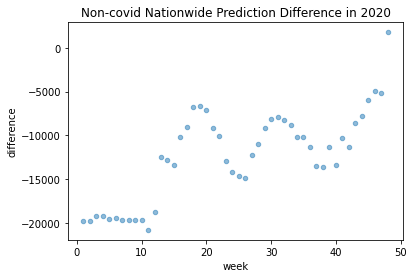

In [595]:
df_20.loc[(df_20["location"] == "United States")].plot.scatter(x="week", y="difference", alpha=0.5, title="Non-covid Nationwide Prediction Difference in 2020")

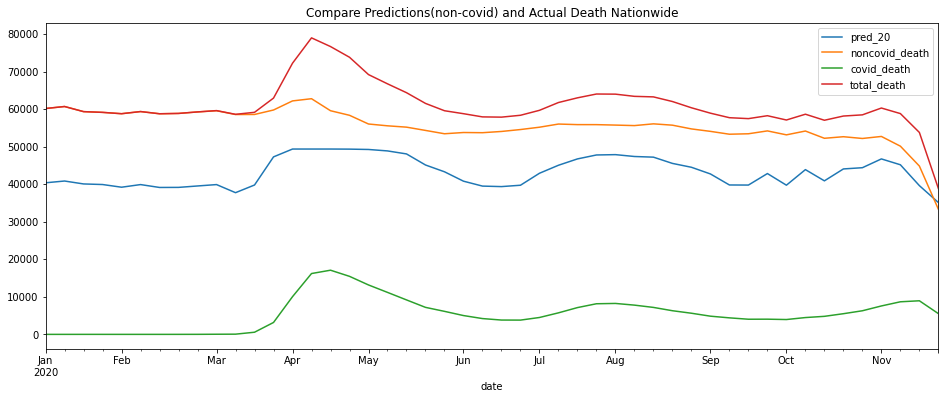

In [596]:
df_20.loc[(df_20.location == "United States"), ['pred_20','noncovid_death', 'covid_death', 'total_death']].plot(title='Compare Predictions(non-covid) and Actual Death Nationwide', figsize=(16,6))

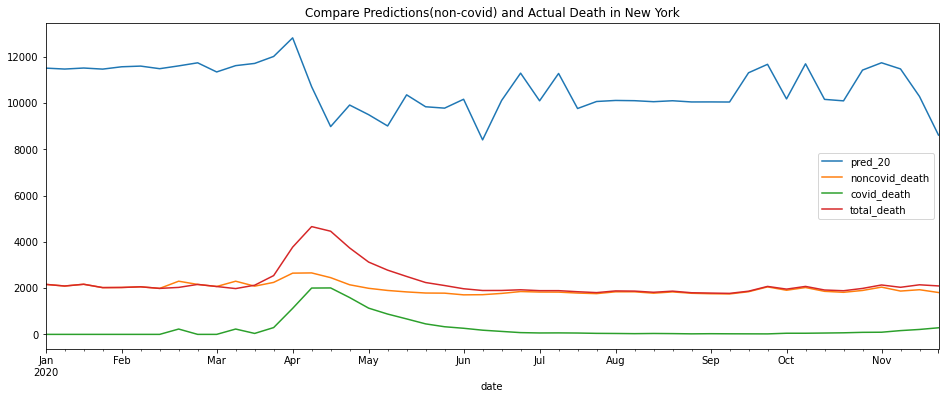

In [597]:
df_20.loc[(df_20.location == "New York"), ['pred_20','noncovid_death', 'covid_death', 'total_death']].plot(title='Compare Predictions(non-covid) and Actual Death in New York', figsize=(16,6))

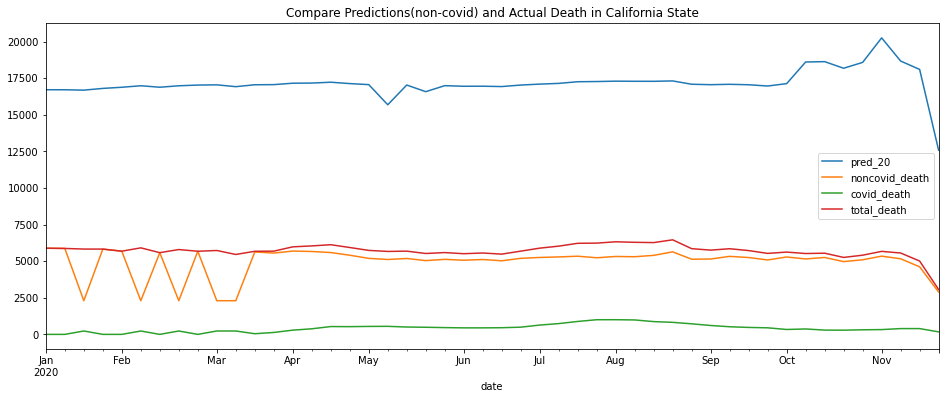

In [598]:
df_20.loc[(df_20.location == "California"), ['pred_20','noncovid_death', 'covid_death', 'total_death']].plot(title='Compare Predictions(non-covid) and Actual Death in California State', figsize=(16,6))